## **Projeto 2: Prevendo a finalização**

Cada linha possui um projeto diferente de site web, como o site de uma escola, de uma padaria e assim por diante.

As pessoas interessadas em criar sites para seus respectivos negócios submetem o projeto a uma empresa e estipulam o número de horas para que o projeto seja criado (expected_hours), 
bem como a quantia a ser paga (price).

A coluna `nao_finalizado` mostra os projetos que foram finalizados (0) e os que não foram finalizados (1) - ou seja, se algum web designer pegou tal projeto, concordando com o prazo e o valor estipulados.



## **Objetivo**

A ideia é, a partir do conjunto de dados fornecido, `tentarmos prever qual projeto será finalizado ou não. `
Dessa forma, podemos oferecer mais informações para as pessoas que submetem os projetos à plataforma, de forma que elas adequem suas estimativa

In [1]:
import pandas as pd

# uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv('../Data/projects.csv', sep=',')
dados.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [2]:
dados["finalizado"] = dados["nao_finalizado"].map({1:0, 0:1})
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


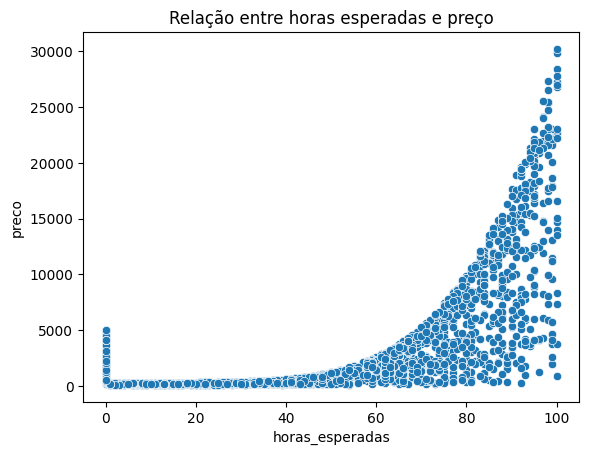

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = "horas_esperadas", y="preco", data=dados)
plt.title("Relação entre horas esperadas e preço")
plt.show()

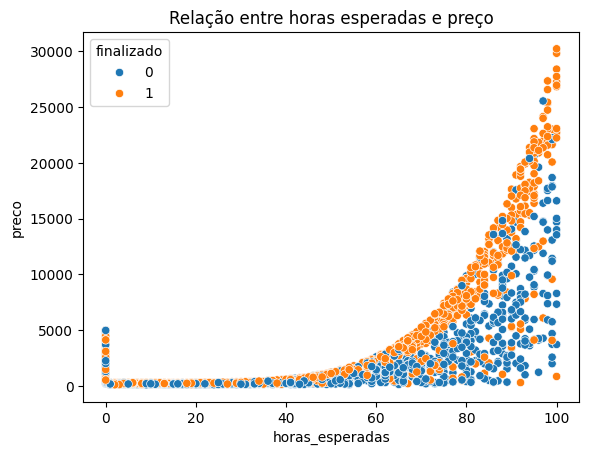

In [4]:
sns.scatterplot(x = "horas_esperadas", y="preco", data=dados, hue="finalizado")
plt.title("Relação entre horas esperadas e preço")
plt.show()

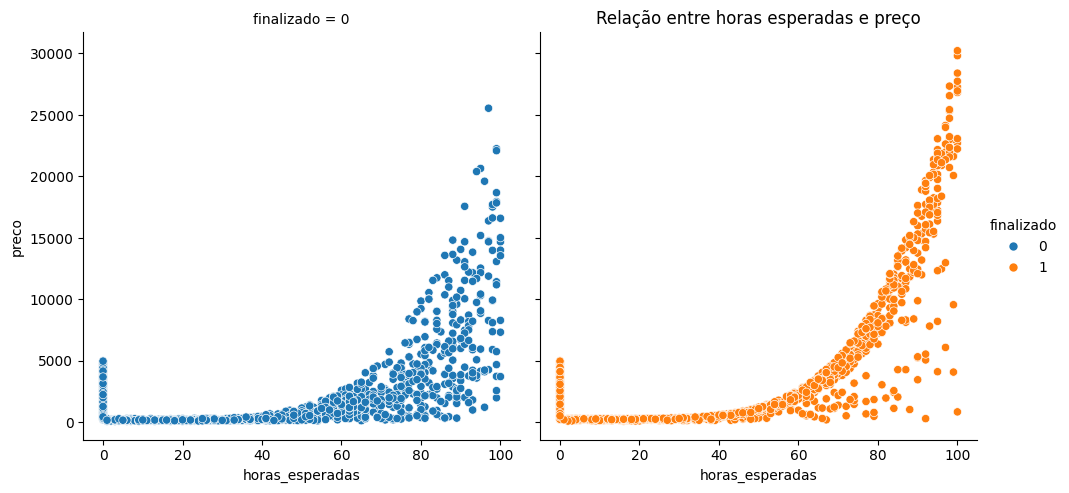

In [5]:
sns.relplot(x = "horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado", kind="scatter")
plt.title("Relação entre horas esperadas e preço") 
plt.show()

In [6]:
dados['preco'].describe()

count     2457.000000
mean      3054.722867
std       4789.921941
min        100.000000
25%        262.000000
50%        921.109331
75%       3696.396356
max      30223.000000
Name: preco, dtype: float64

In [7]:
dados = dados.query("horas_esperadas > 0")
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [8]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [9]:
from sklearn.model_selection import train_test_split

Seed = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.2, random_state=Seed, stratify=y)

print(f"tamanho do treino: {len(treino_x)}")
print(f"tamanho do teste: {len(teste_x)}")

tamanho do treino: 1725
tamanho do teste: 432


In [10]:
treino_x.head()

,horas_esperadas,preco
2284,71.0,4834.0
483,60.0,701.0
138,47.0,553.0
1160,54.0,1125.0
1305,70.0,459.0


In [11]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
previsoes

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [12]:
previsoes

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [13]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"Acurácia: {acuracia:.2f}")

Acurácia: 61.81


In [14]:
previsoes_de_base = teste_y.sum()/len(teste_y)*100
print(f"Acurácia de base: {previsoes_de_base:.2f}")

Acurácia de base: 52.55


## Avaliando

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

confusion = confusion_matrix(y_true=teste_y, y_pred=previsoes, labels=[0, 1])
print(confusion)
tn, fp, fn, tp = confusion.ravel()
print(f"Verdadeiros negativos: {tn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")
print(f"Verdadeiros positivos: {tp}")


[[125  80]
 [ 85 142]]
Verdadeiros negativos: 125
Falsos positivos: 80
Falsos negativos: 85
Verdadeiros positivos: 142


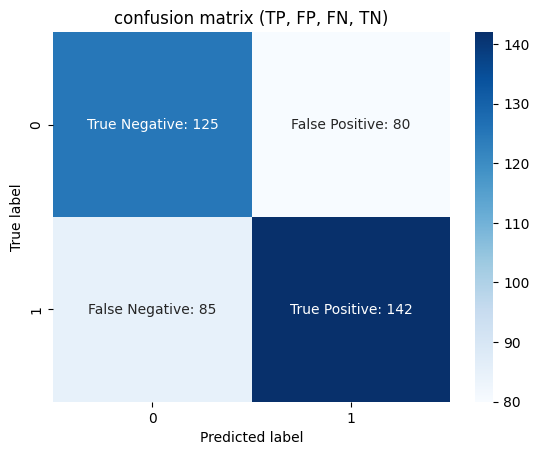

In [16]:
import numpy as np
# Geração dos rótulos personalizados
group_names = [
    f"True Negative: {tn}",  f"False Positive: {fp}",
    f"False Negative: {fn}", f"True Positive: {tp}"
]
labels = np.asarray(group_names).reshape(2, 2)

# Plotando com seaborn
sns.heatmap(confusion,
            annot=labels, # Adiciona os rótulos personalizados
            # annot = True # Adiciona os valores reais
            fmt='', # Formato vazio para não adicionar formatação extra
            cmap='Blues', # Mapa de cores
            # cbar=False, # Remove a barra de cores
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])
# Títulos dos eixos
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('confusion matrix (TP, FP, FN, TN)')
plt.show()

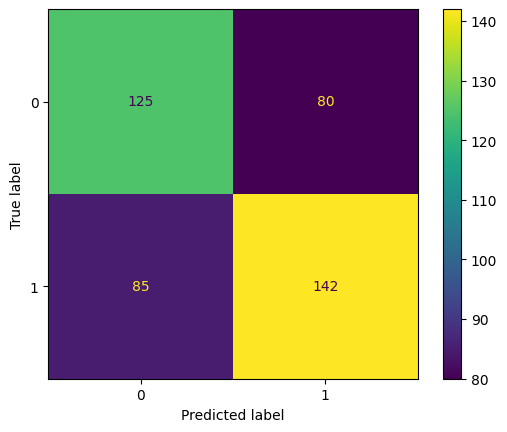

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=[0, 1])
disp.plot()
plt.show()

In [18]:
acuracia = accuracy_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100

f1 = f1_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100

precision = precision_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100

recall = recall_score(
    y_true=teste_y, 
    y_pred=previsoes) * 100


print(f"Acurácia: {acuracia:.2f}%")
print(f"F1: {f1:.2f}%")
print(f"Precisão: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(classification_report(y_true=teste_y, y_pred=previsoes))

Acurácia: 61.81%
F1: 63.25%
Precisão: 63.96%
Recall: 62.56%
              precision    recall  f1-score   support

           0       0.60      0.61      0.60       205
           1       0.64      0.63      0.63       227

    accuracy                           0.62       432
   macro avg       0.62      0.62      0.62       432
weighted avg       0.62      0.62      0.62       432



AUC manual: 0.69398302


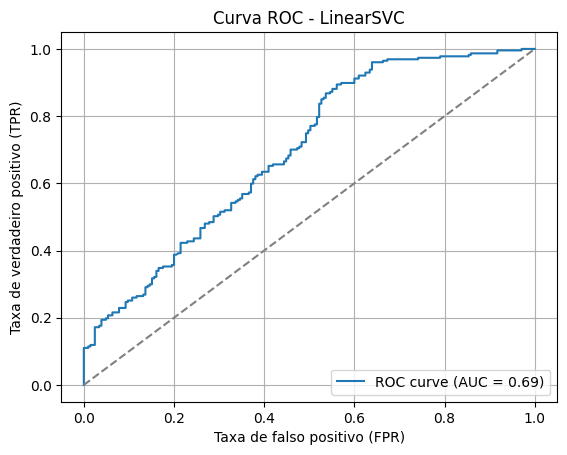

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay


# Obter scores com decision_function (não há predict_proba aqui)
scores = modelo.decision_function(teste_x)

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_true = teste_y, y_score=scores)
roc_auc_manual = auc(x = fpr, y = tpr)
print(f"AUC manual: {roc_auc_manual:.8f}")

# Plotar curva ROC
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_manual:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha aleatória
plt.xlabel("Taxa de falso positivo (FPR)")
plt.ylabel("Taxa de verdadeiro positivo (TPR)")
plt.title("Curva ROC - LinearSVC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [20]:
# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_true = teste_y, y_score=scores)
roc_auc_manual = auc(x = fpr, y = tpr)
print(f"AUC manual: {roc_auc_manual:.8f}")

AUC manual: 0.69398302


In [21]:
# AUC direto
auc_direto = roc_auc_score(y_true = teste_y, y_score = scores)
print(f"AUC direto: {auc_direto:.8f}")

AUC direto: 0.69398302
